#CNN model notebook
Discription:
This model uses spectogram images to classify audio with TensorFlow. We've used librosa liberary to load audio files. Using the wave library, we extracted the waveform audio files and plotted the spectorogram to store them for use in the model.

##Importing libraries

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
from scipy import signal
from scipy.io import wavfile
from pathlib import Path
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import IPython.display as ipd
import scipy.io.wavfile as wav
import wave
import warnings
import pylab
import librosa

##Setting up working directory and subdirectories for data loading

In [ ]:
parent_dir_path = "C:/Users/lfi-4/Desktop/Dataset"
subdirectories = ['Human', 'converted_AI']

In [ ]:
if len(subdirectories) >= 2:
    first_subdir_path = 'C:/Users/lfi-4/Desktop/Dataset/Human'
    second_subdir_path = "C:/Users/lfi-4/Desktop/Dataset/converted_AI"

    files_in_first_subdir = [filename for filename in os.listdir(first_subdir_path) if os.path.isfile(os.path.join(first_subdir_path, filename))]

    files_in_second_subdir = [filename for filename in os.listdir(second_subdir_path) if os.path.isfile(os.path.join(second_subdir_path, filename))]

    print(f"Files from the first subdirectory ({subdirectories[0]}):")
    for i in range(min(5, len(files_in_first_subdir))):
        print(files_in_first_subdir[i])

    print(f"\nFiles from the second subdirectory ({subdirectories[1]}):")
    for i in range(min(5, len(files_in_second_subdir))):
        print(files_in_second_subdir[i])

Files from the first subdirectory (Human):
ARA NORM  0002.wav
ARA NORM  0003.wav
ARA NORM  0004.wav
ARA NORM  0005.wav
ARA NORM  0006.wav

Files from the second subdirectory (converted_AI):
conv_0.07000000000005_13.2997594607646356k_SBA_128_1.wav
conv_0.1000000000001364_2.9700000000000286k_SBA_104_2.wav
conv_0.6199999999998909_9.4901417488237086k_SBA_118_2.wav
conv_0.6299999999999955_19.8199999999999366k_SBA_118_1.wav
conv_0.650000000000091_4.8500000000001366k_SBA_108_1.wav


In [ ]:
data = []
labels = ['Human','converted_AI']
file_lists = []

In [ ]:
def floop(path):
  files_in_folder = []
  for audio_file in os.listdir(path)[0:320]:
    if audio_file.endswith(".wav"):
      audio_path = os.path.join(path, audio_file)
      files_in_folder.append(audio_file)
      y, sr = librosa.load(audio_path, sr=16000)
      data.append(y)
  return files_in_folder

file_lists.append(floop("C:/Users/lfi-4/Desktop/Dataset/Human"))
file_lists.append(floop("C:/Users/lfi-4/Desktop/Dataset/converted_AI"))


In [ ]:
print(file_lists)

[['ARA NORM  0002.wav', 'ARA NORM  0003.wav', 'ARA NORM  0004.wav', 'ARA NORM  0005.wav', 'ARA NORM  0006.wav', 'ARA NORM  0007.wav', 'ARA NORM  0008.wav', 'ARA NORM  0009.wav', 'ARA NORM  0010.wav', 'ARA NORM  0011.wav', 'ARA NORM  0012.wav', 'ARA NORM  0013.wav', 'ARA NORM  0014.wav', 'ARA NORM  0015.wav', 'ARA NORM  0016.wav', 'ARA NORM  0017.wav', 'ARA NORM  0018.wav', 'ARA NORM  0019.wav', 'ARA NORM  0020.wav', 'ARA NORM  0021.wav', 'ARA NORM  0022.wav', 'ARA NORM  0023.wav', 'ARA NORM  0024.wav', 'ARA NORM  0025.wav', 'ARA NORM  0026.wav', 'ARA NORM  0027.wav', 'ARA NORM  0028.wav', 'ARA NORM  0029.wav', 'ARA NORM  0030.wav', 'ARA NORM  0031.wav', 'ARA NORM  0032.wav', 'ARA NORM  0033.wav', 'ARA NORM  0034.wav', 'ARA NORM  0035.wav', 'ARA NORM  0036.wav', 'ARA NORM  0037.wav', 'ARA NORM  0038.wav', 'ARA NORM  0039.wav', 'ARA NORM  0040.wav', 'ARA NORM  0041.wav', 'ARA NORM  0042.wav', 'ARA NORM  0043.wav', 'ARA NORM  0044.wav', 'ARA NORM  0045.wav', 'ARA NORM  0046.wav', 'ARA NOR

In [ ]:
print("Sample audio data:", data[:5])
print("Corresponding labels:", labels[:5])

Sample audio data: [array([0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 6.855047e-05,
       6.873990e-05, 6.399762e-05], dtype=float32), array([ 1.8014769e-06, -2.9531695e-06,  5.5635478e-06, ...,
        2.4034085e-05,  2.8363993e-05,  0.0000000e+00], dtype=float32), array([-2.1540518e-06,  3.9202391e-06, -7.9200354e-06, ...,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00], dtype=float32), array([ 3.0902474e-06, -4.4339245e-06,  7.1233771e-06, ...,
       -1.4551915e-11,  7.2759576e-12, -1.4551915e-11], dtype=float32), array([-6.3034065e-07,  7.9877145e-07, -1.2076866e-06, ...,
        2.0929616e-05,  3.5118421e-05,  1.4135865e-05], dtype=float32)]
Corresponding labels: ['Human', 'converted_AI']


In [ ]:
print("Number of audio samples:", len(data))
print("Number of labels:", len(labels))

Number of audio samples: 640
Number of labels: 2


#Checking the loaded data and plotting the waveform

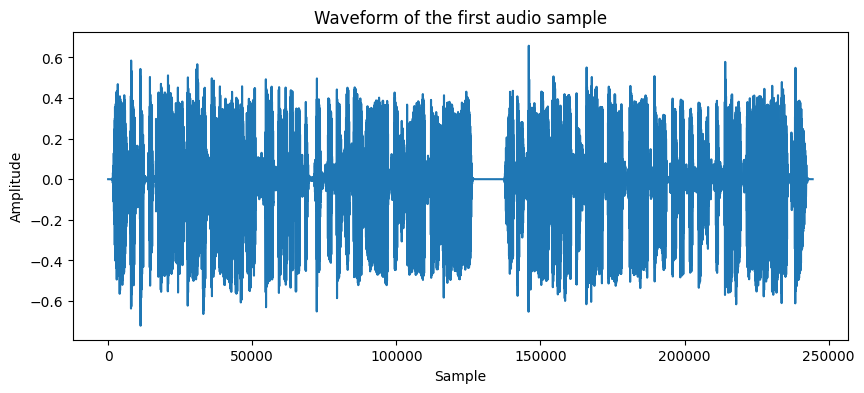

In [ ]:
plt.figure(figsize=(10, 4))
plt.title("Waveform of the first audio sample")
plt.plot(data[0])
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.show()


In [ ]:
for i in range(2):
    class_folder = os.listdir(parent_dir_path)[i]
    print(f"Files from {class_folder}:")
    for audio_file in file_lists[i][:5]:
        print(audio_file)

Files from converted_AI:
ARA NORM  0002.wav
ARA NORM  0003.wav
ARA NORM  0004.wav
ARA NORM  0005.wav
ARA NORM  0006.wav
Files from Human:
conv_0.07000000000005_13.2997594607646356k_SBA_128_1.wav
conv_0.1000000000001364_2.9700000000000286k_SBA_104_2.wav
conv_0.6199999999998909_9.4901417488237086k_SBA_118_2.wav
conv_0.6299999999999955_19.8199999999999366k_SBA_118_1.wav
conv_0.650000000000091_4.8500000000001366k_SBA_108_1.wav


#Setting up model hyperparameters and extracting waveforms as spectogram images

In [ ]:
SIZE = 128
BATCH_SIZE = 16
channels = 3
kernel = 4
stride = 1
pool = 2
output_dir = "C:/Users/lfi-4/Desktop/photo"
child_dir1 = "C:/Users/lfi-4/Desktop/Dataset/converted_AI"
child_dir2 = "C:/Users/lfi-4/Desktop/Dataset/Human"
#list_dir = [child_dir1, child_dir2]
for filename in os.listdir(child_dir1):
    if "wav" in filename:
        file_path = os.path.join(child_dir1, filename)
        target_dir = f'class_c'
        dist_dir = os.path.join(output_dir, target_dir)
        file_dist_path = os.path.join(dist_dir, filename)
        if not os.path.exists(file_dist_path + '.png'):
            if not os.path.exists(dist_dir):
                os.mkdir(dist_dir)
            frame_rate, data = wav.read(file_path)
            signal_wave = wave.open(file_path)
            sig = np.frombuffer(signal_wave.readframes(frame_rate), dtype=np.int16)
            fig = plt.figure()
            plt.specgram(sig, NFFT=1024, Fs=frame_rate, noverlap=900)
            plt.axis('off')
            fig.savefig(f'{file_dist_path}.png', dpi=fig.dpi)
            plt.close()

In [ ]:
target_dir

'class_c'

In [ ]:
dist_dir

'C:/Users/lfi-4/Desktop/photo\\class_c'

In [ ]:
file_dist_path

'C:/Users/lfi-4/Desktop/photo\\class_c\\c_ARA NORM  1814.wav'

In [ ]:
file_path

'C:/Users/lfi-4/Desktop/Dataset/converted_AI\\c_ARA NORM  1814.wav'

In [ ]:
#splitting data into train and vaildate
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
                                             batch_size=BATCH_SIZE,
                                             validation_split=0.3,
                                             directory=output_dir,
                                             shuffle=True,
                                             color_mode='rgb',
                                             image_size=(SIZE, SIZE),
                                             subset="training",
                                             seed=0);

valid_dataset = tf.keras.preprocessing.image_dataset_from_directory(
                                             batch_size=BATCH_SIZE,
                                             validation_split=0.2,
                                             directory=output_dir,
                                             shuffle=True,
                                             color_mode='rgb',
                                             image_size=(SIZE, SIZE),
                                             subset="validation",
                                             seed=0);

print(type(valid_dataset))
print(type(train_dataset))

Found 17813 files belonging to 2 classes.
Using 12470 files for training.
Found 17813 files belonging to 2 classes.
Using 3562 files for validation.
<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>
<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>


###Plotting extracted spectogram with labels

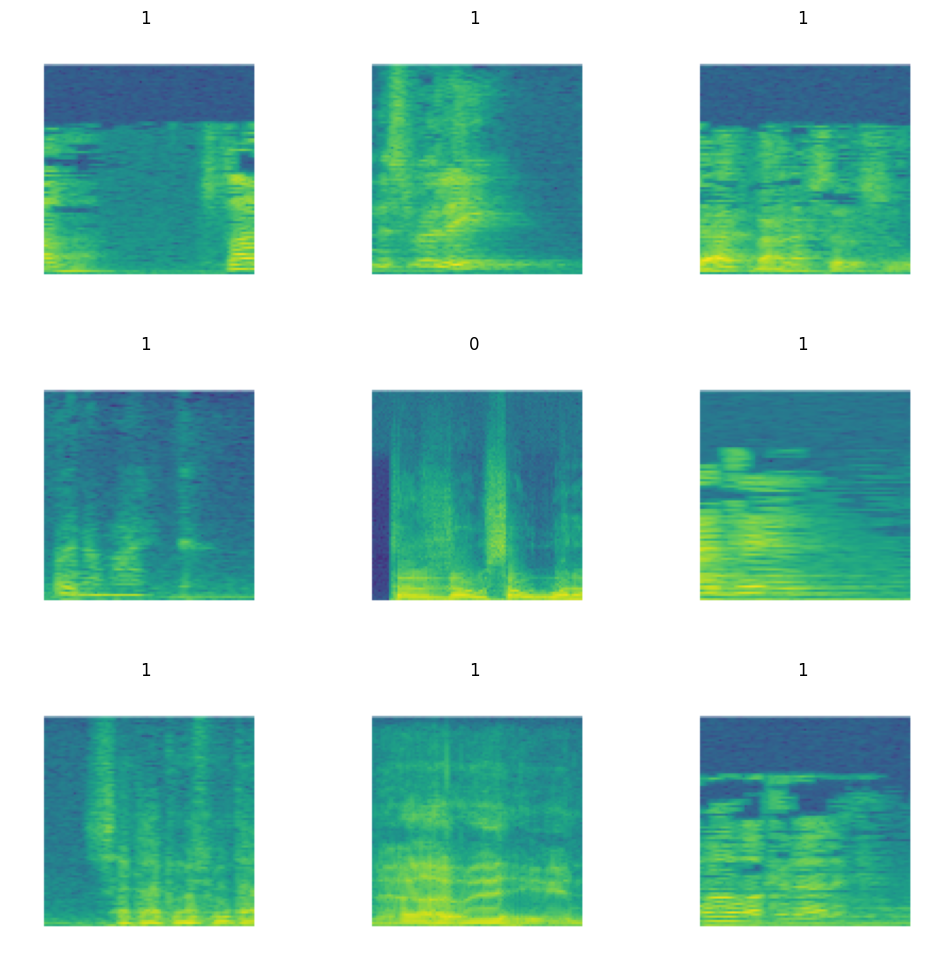

In [ ]:
plt.figure(figsize=(12, 12));
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1);
        plt.imshow(images[i].numpy().astype("uint8"));
        plt.title(int(labels[i]));
        plt.axis("off");
plt.show();

#Model designing

In [ ]:
class_names = train_dataset.class_names
num_classes = len(class_names)
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = valid_dataset.cache().prefetch(buffer_size=AUTOTUNE)

model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(SIZE, SIZE, channels)),
    layers.Conv2D(16, kernel, activation='relu'),
    layers.MaxPool2D(pool),
    layers.Conv2D(32, kernel, activation='relu'),
    layers.MaxPool2D(pool),
    layers.Dropout(0.8),
    layers.Conv2D(64, kernel, activation='relu'),
    layers.MaxPool2D(pool),
    layers.Conv2D(128, kernel, activation='relu'),
    layers.MaxPool2D(pool),
    layers.Dropout(0.5),
    layers.Conv2D(256, kernel, activation='relu'),
    layers.MaxPool2D(pool),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(256, activation='sigmoid'),
    layers.Dense(num_classes)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 125, 125, 16)      784       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 59, 59, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 29, 29, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 29, 29, 32)        0

In [ ]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  1


In [ ]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
   filepath='checkpoint.h5',
   save_weights_only=False,
   monitor='val_accuracy',
   mode='max',
   save_best_only=True)
model.compile(optimizer='adam',
                  loss= tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True),
                  metrics=['accuracy'])

##Fitting the model

In [ ]:
epochs = 20
history = model.fit(
    train_ds, epochs=epochs, callbacks=model_checkpoint_callback, validation_data=val_ds,
);

Epoch 1/20
780/780 [==============================] - 102s 50ms/step - loss: 0.1453 - accuracy: 0.9522 - val_loss: 0.0149 - val_accuracy: 0.9944
Epoch 2/20
780/780 [==============================] - 30s 38ms/step - loss: 0.0153 - accuracy: 0.9956 - val_loss: 0.0169 - val_accuracy: 0.9994
Epoch 3/20
780/780 [==============================] - 42s 54ms/step - loss: 0.0072 - accuracy: 0.9979 - val_loss: 0.0095 - val_accuracy: 0.9986
Epoch 4/20
780/780 [==============================] - 36s 46ms/step - loss: 0.0066 - accuracy: 0.9983 - val_loss: 0.0130 - val_accuracy: 0.9986
Epoch 5/20
780/780 [==============================] - 53s 68ms/step - loss: 0.0079 - accuracy: 0.9981 - val_loss: 0.0089 - val_accuracy: 0.9983
Epoch 6/20
780/780 [==============================] - 29s 37ms/step - loss: 0.0080 - accuracy: 0.9978 - val_loss: 0.0078 - val_accuracy: 0.9980
Epoch 7/20
780/780 [==============================] - 31s 40ms/step - loss: 0.0055 - accuracy: 0.9986 - val_loss: 0.0082 - val_accuracy

In [ ]:
# Evaluate the model on the test data
#test_loss, test_acc = model.evaluate(
#    test_dataset,
#    steps=len(data) // BATCH_SIZE
#)

#print(f'Test Loss: {test_loss}')
#print(f'Test Accuracy: {test_acc}')

1113/1113 [==============================] - 38s 34ms/step - loss: 0.0060 - accuracy: 0.9989
Test Loss: 0.00598588353022933
Test Accuracy: 0.9989330768585205


###Plotting training and validation loss

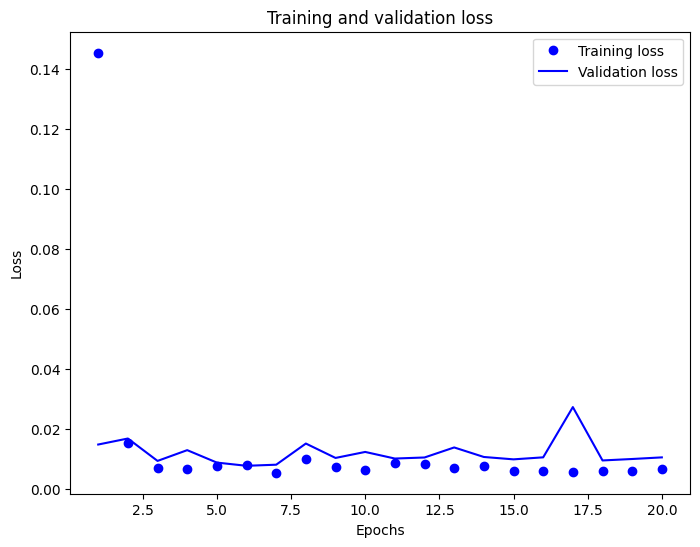

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)

plt.figure(figsize=(8,6))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

###Plotting training and validation accuracy

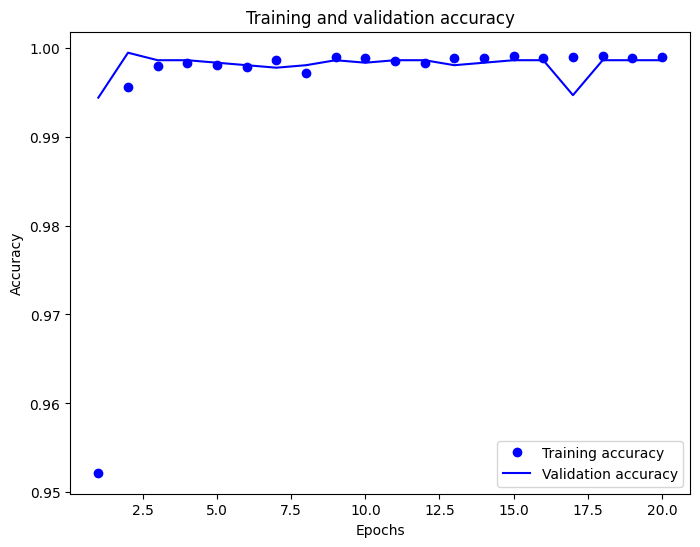

In [ ]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values)+1)

plt.figure(figsize=(8,6))
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import tf2onnx

In [ ]:
tf.saved_model.save(model, './tensorflow')

INFO:tensorflow:Assets written to: ./tensorflow\assets


INFO:tensorflow:Assets written to: ./tensorflow\assets


In [ ]:
# predictions = model.predict(test_dataset)

# # 2. Compare the predicted labels with the actual labels
# # Assuming your test dataset has labels (ground truth), you can extract them like this:
# true_labels = [label for _, label in test_dataset]

# # 3. Calculate accuracy
# from sklearn.metrics import accuracy_score
# import numpy as np

# # Convert the predicted probabilities into class labels (0 or 1, for binary classification)
# predicted_labels = np.argmax(predictions, axis=-1)

# # Calculate accuracy
# accuracy = accuracy_score(true_labels, predicted_labels)

# # Print the accuracy
# print(f"Test Accuracy: {accuracy}")

In [ ]:
#test_dataset

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
# # Generate predictions
# y_pred = []
# y_true = []

# for i in range(len(test_dataset)):
#     x_val, y_val = test_dataset.next()
#     y_pred.extend(np.argmax(model.predict(x_val), axis=-1))
#     y_true.extend(np.argmax(y_val, axis=-1))

# # Compute the confusion matrix
# conf_matrix = confusion_matrix(y_true, y_pred)

# # Display the confusion matrix using Seaborn
# plt.figure(figsize=(10, 10))
# sns.heatmap(conf_matrix, annot=True, fmt="d")
# plt.title('Confusion matrix')
# plt.ylabel('Actual label')
# plt.xlabel('Predicted label')
#plt.show()

AttributeError: 'BatchDataset' object has no attribute 'next'

In [ ]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sns

# # Get the true labels
# true_labels = []
# for _, labels in test_dataset:
#     true_labels.extend(labels.numpy())

# # Get the predicted labels
# predictions = model.predict(test_dataset)
# predicted_labels = [np.argmax(pred) for pred in predictions]

# # Calculate the confusion matrix
# cm = confusion_matrix(true_labels, predicted_labels)

# # Visualize the confusion matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
# plt.ylabel('Actual')
# plt.xlabel('Predicted')
# plt.title('Confusion Matrix')
# plt.show()

NameError: name 'test_dataset' is not defined

In [ ]:
# # Step 1: Import the classification_report function
# from sklearn.metrics import classification_report

# # Step 2: Get the predicted labels
# y_pred_probs = model.predict(test_dataset)
# y_pred = np.argmax(y_pred_probs, axis=1)

# # Step 3: Get the true labels
# # Note: This assumes that your test_dataset yields batches of (inputs, labels)
# y_true = np.concatenate([y for x, y in test_dataset])

# # Step 4: Generate and print the classification report
# print(classification_report(y_true, y_pred, target_names=class_names))

1114/1114 [==============================] - 25s 22ms/step
              precision    recall  f1-score   support

     class_A       1.00      1.00      1.00      1812
     class_c       1.00      1.00      1.00     16001

    accuracy                           1.00     17813
   macro avg       1.00      1.00      1.00     17813
weighted avg       1.00      1.00      1.00     17813

